# Cuarentena Beck-Pareja Analisis

## Importando las librerias a utilizar

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
from scipy import stats 

c:\users\jesús\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Limpieza General Del CSV (fuente de informacion)

In [2]:
#Lectura del dataset
data = pd.read_csv("data.csv", index_col=False)
#Mostrando datos
data.head(5)

,participant,age:1,gender:1,religion:1,religion:2,religion:3,religion:4,religion:5,religion:6,religion:7,...,marital_2:1,marital_3:1,marital_4:1,marital_5:1,marital_6:1,marital_7:1,country,TIME_start,TIME_end,TIME_total
0,s.0c839479-01f4-4804-affd-51125c84d179.txt,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,1.0,4.0,5.0,3.0,"MX, Mexico",2020-04-08-22-50,2020-04-08-23-00,10.0
1,s.b9337b43-3599-4a8c-8b30-4b2e3ae9062d.txt,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,2.0,3.0,5.0,3.0,NaN,NaN,2020-04-07-21-21,NaN
2,s.560f6238-aaf8-4df8-aca6-716e3cfe8245.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"MX, Mexico",2020-04-18-19-40,NaN,NaN
3,s.241ecc36-8ce6-4ae5-9532-ac8be3a5db7a.txt,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,5.0,1.0,4.0,5.0,3.0,"MX, Mexico",2020-04-18-21-03,2020-04-18-21-14,11.0
4,s.cd498029-6267-4e88-b9ed-a65c9c6180fc.txt,8.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,2.0,2.0,4.0,3.0,"MX, Mexico",2020-04-19-01-12,2020-04-19-01-28,16.0


#### En este caso, antes de trabajar los valores faltantes, elimino las columnas que no seran utiles segun los requerimientos que me han dicho

In [3]:
#Mostranto todas las columnas
print(data.columns.tolist())

['participant', 'age:1', 'gender:1', 'religion:1', 'religion:2', 'religion:3', 'religion:4', 'religion:5', 'religion:6', 'religion:7', 'religion:8', 'religion:9', 'religion:10', 'religion:11', 'estado:1', 'noticias:1', 'cuarentena_1:1', 'cuarentena_2:1', 'cuarentena_3:1', 'home_office:1', 'ndc:1', 'ndc:2', 'ndc:3', 'ndc:4', 'ndc:5', 'ndc:6', 'ndc:7', 'ndc:8', 'ndc:9', 'ndc:10', 'ndc:11', 'ndc:12', 'ndc:13', 'ndc:14', 'ndc:15', 'ndc:16', 'ndc:17', 'ndc:18', 'beck:1', 'beck:2', 'beck:3', 'beck:4', 'beck:5', 'beck:6', 'beck:7', 'beck:8', 'beck:9', 'beck:10', 'beck:11', 'beck:12', 'beck:13', 'beck:14', 'beck:15', 'beck:16', 'beck:17', 'beck:18', 'beck:19', 'beck:20', 'beck:21', 'marital_1:1', 'marital_2:1', 'marital_3:1', 'marital_4:1', 'marital_5:1', 'marital_6:1', 'marital_7:1', 'country', 'TIME_start', 'TIME_end', 'TIME_total']


In [4]:
#Borrando las columnas no necesarias
data.drop(columns=['participant', 'age:1', 'gender:1','country', 'TIME_start', 'TIME_end', 'TIME_total',
                  'religion:1', 'religion:2', 'religion:3', 'religion:4', 'religion:5', 'religion:6', 'religion:7', 'religion:8', 'religion:9', 'religion:10', 'religion:11', 
                   'estado:1', 'noticias:1', 'cuarentena_1:1', 'cuarentena_2:1', 'cuarentena_3:1', 'home_office:1'], inplace=True)
#Eliminando las filas que tengan valores faltantes. 
data.dropna(inplace=True, how="any")
#Reseteando index
data.reset_index(inplace=True, drop=True)
data.astype(int).head()

,ndc:1,ndc:2,ndc:3,ndc:4,ndc:5,ndc:6,ndc:7,ndc:8,ndc:9,ndc:10,...,beck:19,beck:20,beck:21,marital_1:1,marital_2:1,marital_3:1,marital_4:1,marital_5:1,marital_6:1,marital_7:1
0,4,4,1,1,3,2,1,3,3,3,...,0,0,0,4,4,4,1,4,5,3
1,5,4,1,1,1,3,2,3,3,4,...,0,1,0,3,3,5,1,4,5,3
2,1,1,3,5,3,1,1,5,5,2,...,0,0,0,3,3,3,2,2,4,3
3,3,5,1,5,4,5,2,1,1,5,...,0,1,1,5,5,5,1,5,5,3
4,5,5,1,5,1,5,1,5,5,5,...,0,0,0,5,5,5,1,5,5,1


# Calculo del Valor P con significancia estadistica de las preguntas

Para que exista un relacion entre dos variables se realizan pruebas de hipotesis asumiento un valor de P-Valor= 0.05 contra el valor P-Valor obtenido de cada una de las variables que pueden tener relacion.

Aqui agrego algunos sitios webs y documentos que me sirvieron como una referencia. 
Si existe algun error, favor de decirme con total libertad.
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
* https://personal.us.es/vararey/adatos2/correlacion.pdf
* https://www.pluralsight.com/guides/finding-relationships-data-with-python 


### Beck Vs Ndc

In [5]:
#Funcion Creada para evaluar de forma automatica y mas rapida cada una de las preguntas 
def beckvsndc(beck, lista,p):
    """
    Esta funcion recibe como parametro el numero de la pregunta de Beck Para evaluar con las preguntas de ndc (que son 18 en total)
    Input: String o Entero para seleccionar la pregunta o variable
    Output: Retorna una lista con las variables que tienen cierta relacion en base a una significancia estadistica.
    Igual Imprime cada una de ellas. 
    """
    #Lista Vacia    
    var_column = "beck:"+str(beck)
    #Rango por la cantidad total de preguntas que le pertenecen al NDC
    for j in range(1,19): 
        #Valor que toma por variable
        ndc = "ndc:"+str(j)
        #Coeficiente de Pearson y P-valor entre las variables
        r, p_value = stats.pearsonr(data[var_column], data[ndc])
        #Formato de salida de texto
        #print(f"La significancia estadística entre la pregunta #{beck} de Beck y la pregunta #{str(j)} del ndc es: \nP-Value: {p_value} \nCoeficiente de relación {r}\n")
        #Conservando solo las variables en las cuales el valor p es menor de 0.05 aceptadando que existe una relacion entre ambas
        if p_value <=p:
            string = f"La pregunta del beck #{beck} con la pregunta #{str(j)} del ndc con un P-valor de: {p_value} y Coeficiente De Relaccion (Pearson) de: {r}" 
            lista.append(string)
    return lista

In [6]:
lista=[]
lista = beckvsndc(1,lista,p=0.05)
lista = beckvsndc(2,lista,p=0.05)
lista = beckvsndc(3,lista,p=0.05)
lista = beckvsndc(4,lista,p=0.05)
lista = beckvsndc(5,lista,p=0.05)
lista = beckvsndc(6,lista,p=0.05)
lista = beckvsndc(7,lista,p=0.05)
lista = beckvsndc(8,lista,p=0.05)
lista = beckvsndc(9,lista,p=0.05)
lista = beckvsndc(10,lista,p=0.05)
lista = beckvsndc(11,lista,p=0.05)
lista = beckvsndc(12,lista,p=0.05)
lista = beckvsndc(13,lista,p=0.05)
lista = beckvsndc(14,lista,p=0.05)
lista = beckvsndc(15,lista,p=0.05)
lista = beckvsndc(16,lista,p=0.05)
lista = beckvsndc(17,lista,p=0.05)
lista = beckvsndc(18,lista,p=0.05)
lista = beckvsndc(19,lista,p=0.05)
lista = beckvsndc(20,lista,p=0.05)
lista = beckvsndc(21,lista,p=0.05)

### Variables (Preguntas) que tienen una relacion (P-valor<0.05) 


In [7]:
for element in lista:
    print(element,"\n")

La pregunta del beck #1 con la pregunta #15 del ndc con un P-valor de: 0.023492715523695903 y Coeficiente De Relaccion (Pearson) de: 0.3995112354268681 

La pregunta del beck #1 con la pregunta #18 del ndc con un P-valor de: 0.01642163032785629 y Coeficiente De Relaccion (Pearson) de: 0.42098455624550224 

La pregunta del beck #3 con la pregunta #15 del ndc con un P-valor de: 0.03823205051473215 y Coeficiente De Relaccion (Pearson) de: 0.3680177832124077 

La pregunta del beck #4 con la pregunta #15 del ndc con un P-valor de: 0.010879360110729836 y Coeficiente De Relaccion (Pearson) de: 0.44414292439763053 

La pregunta del beck #5 con la pregunta #15 del ndc con un P-valor de: 0.02347385126124818 y Coeficiente De Relaccion (Pearson) de: 0.39956091333816457 

La pregunta del beck #6 con la pregunta #14 del ndc con un P-valor de: 0.037488468439220234 y Coeficiente De Relaccion (Pearson) de: 0.3693443479520872 

La pregunta del beck #6 con la pregunta #15 del ndc con un P-valor de: 0.027

### Variables (Preguntas) que tienen una relacion (P-valor<0.01) 

In [8]:
lista=[]
lista = beckvsndc(1,lista,p=0.01)
lista = beckvsndc(2,lista,p=0.01)
lista = beckvsndc(3,lista,p=0.01)
lista = beckvsndc(4,lista,p=0.01)
lista = beckvsndc(5,lista,p=0.01)
lista = beckvsndc(6,lista,p=0.01)
lista = beckvsndc(7,lista,p=0.01)
lista = beckvsndc(8,lista,p=0.01)
lista = beckvsndc(9,lista,p=0.01)
lista = beckvsndc(10,lista,p=0.01)
lista = beckvsndc(11,lista,p=0.01)
lista = beckvsndc(12,lista,p=0.01)
lista = beckvsndc(13,lista,p=0.01)
lista = beckvsndc(14,lista,p=0.01)
lista = beckvsndc(15,lista,p=0.01)
lista = beckvsndc(16,lista,p=0.01)
lista = beckvsndc(17,lista,p=0.01)
lista = beckvsndc(18,lista,p=0.01)
lista = beckvsndc(19,lista,p=0.01)
lista = beckvsndc(20,lista,p=0.01)
lista = beckvsndc(21,lista,p=0.01)

In [9]:
for element in lista:
    print(element)

### Variables (Preguntas) que tienen una relacion (P-valor<0.001) 

In [10]:
lista=[]
lista = beckvsndc(1,lista,p=0.001)
lista = beckvsndc(2,lista,p=0.001)
lista = beckvsndc(3,lista,p=0.001)
lista = beckvsndc(4,lista,p=0.001)
lista = beckvsndc(5,lista,p=0.001)
lista = beckvsndc(6,lista,p=0.001)
lista = beckvsndc(7,lista,p=0.001)
lista = beckvsndc(8,lista,p=0.001)
lista = beckvsndc(9,lista,p=0.001)
lista = beckvsndc(10,lista,p=0.001)
lista = beckvsndc(11,lista,p=0.001)
lista = beckvsndc(12,lista,p=0.001)
lista = beckvsndc(13,lista,p=0.001)
lista = beckvsndc(14,lista,p=0.001)
lista = beckvsndc(15,lista,p=0.001)
lista = beckvsndc(16,lista,p=0.001)
lista = beckvsndc(17,lista,p=0.001)
lista = beckvsndc(18,lista,p=0.001)
lista = beckvsndc(19,lista,p=0.001)
lista = beckvsndc(20,lista,p=0.001)
lista = beckvsndc(21,lista,p=0.001)

In [11]:
for element in lista:
    print(element)

### Mismos Resultados, pero representado en un tabla para mejorar la facilidad de lectura y comprension

Los valores son los mismos de lo que se encuentra en la parte superior.

En este caso, los valores *-* representan que dichos coeficientes no pasaron la prueba de significancia y no son considerados en esta situacion.

Mientras que los unicos valores dentro de esta son los que pasaron la prueba de significancia.


In [12]:
index = [ 'beck:1', 'beck:3', 'beck:4', 'beck:5', 'beck:6', 'beck:7', 
         'beck:10', 'beck:11']

datos = { 
         'ndc:11':["-","-","-","-","-","-","-","-0.36*"],
         'ndc:12':["-","-","-","-","-","-","-0.36*","-"],
         'ndc:14':["-","-","-","-","0.36*","-","0.40*","-"], 
         'ndc:15':["0.39*","0.36*","0.44*","0.39*","0.38*","0.36*","0.42*","-"],
         'ndc:16':["-","-","-","-","-","-","-","-0.36*"], 
         'ndc:18':["0.42*","-","-","-","-","-","-","-"]}

In [13]:
#Creando DataFrame
resultado = pd.DataFrame(datos, index)
#Reseteando Index
resultado.reset_index(inplace=True)
#Renombrando 
resultado.rename(columns={"index":"Preguntas"}, inplace=True)
#resultado.dropna(axis=0, inplace=True)

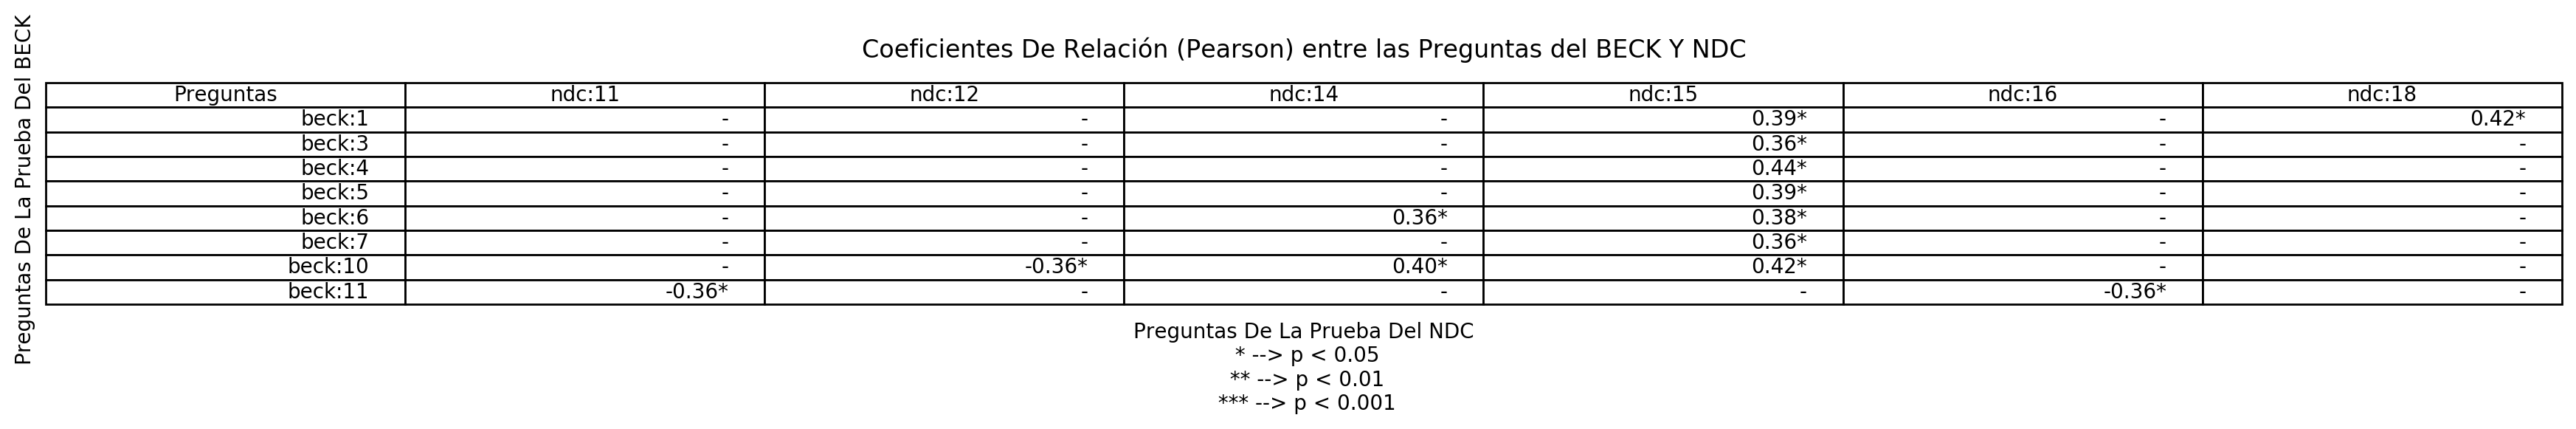

In [14]:
#Creando Subplots
fig, ax = plt.subplots(figsize=(22,2), dpi=200)
# hide axes
fig.patch.set_visible(False)
#Eliminando contorno, y lineas/numeros de los ejes
plt.box([])
plt.yticks([])
plt.xticks([])
#Titulo
plt.title("Coeficientes De Relación (Pearson) entre las Preguntas del BECK Y NDC",pad=10)
#Tabla
ax.table(cellText=resultado.values, colLabels=resultado.columns, loc="upper center")
ax.set_xlabel('Preguntas De La Prueba Del NDC\n * --> p < 0.05\n ** --> p < 0.01\n *** --> p < 0.001', labelpad=10)
ax.set_ylabel('Preguntas De La Prueba Del BECK', labelpad=5)

#plt.tight_layout()
plt.savefig('BECK-NDC.jpg', bbox_inches='tight')
plt.show()

Resultado:

Las variables faltantes, en este caso **beck** y **ndc** que no se encuentran dentro de la tabla, es debido al hecho de que no existio un P-valor (prueba estadistica) que respaldara la relación entre dichas variables.

Debido a eso, dichas variables han sido eliminadas de la tabla para permitir una lectura mas rapida de los valores que si aprovaron.

De la misma forma, los valores que contienen un " * " a lado de ellos, significa que pasaron con un valor de **P < 0.05**

Dos " ** " con un valor de **P < 0.01**

Tres " ** * " con un valor de **P < 0.001**.

Por consecuencia, al encontrar un valor con " ** * " significa que paso la prueba con **P < 0.05** y **P < 0.01**. 

Y aplica de la misma forma al encontrarse con valor que contenga " ** ".

### Beck Vs Marital

In [15]:
#Funcion Creada para evaluar de forma automatica y mas rapida cada una de las preguntas 
def beckvsmarital(marital, lista,p):
    """
    Esta funcion recibe como parametro el numero de la pregunta de Beck Para evaluar con las preguntas de Correspondientes al marital (que son 7 en total)
    Input: String o Entero para seleccionar la pregunta o variable
    Output: Retorna una lista con las variables que tienen cierta relacion en base a una significancia estadistica.
    Igual Imprime cada una de ellas. 
    """
    #Lista Vacia    
    var_column = "marital_"+str(marital)+":1"
    #Rango por la cantidad total de preguntas que le pertenecen al Beck
    for j in range(1,22): 
        #Valor que toma por variable
        beck = "beck:"+str(j)
        #Coeficiente de Pearson y P-valor entre las variables
        r, p_value = stats.pearsonr(data[var_column], data[beck])
        #Formato de salida de texto
        #print(f"La significancia estadística entre la pregunta #{marital} del marital y la pregunta #{str(j)} del beck es: \nP-Value: {p_value} \nCoeficiente de relación {r}\n")
        #Conservando solo las variables en las cuales el valor p es menor de 0.05 aceptadando que existe una relacion entre ambas
        if p_value <=p:
            string = f"La pregunta del marital #{marital} con la pregunta #{str(j)} del beck con un P-valor de: {p_value} y Coeficiente De Relaccion (Pearson) de: {r}" 
            lista.append(string)
    return lista

### Variables (Preguntas) que tienen una relacion (P-valor<0.05) 


In [16]:
lista2= []
lista2= beckvsmarital(1, lista2,p=0.05)
lista2= beckvsmarital(2, lista2,p=0.05)
lista2= beckvsmarital(3, lista2,p=0.05)
lista2= beckvsmarital(4, lista2,p=0.05)
lista2= beckvsmarital(5, lista2,p=0.05)
lista2= beckvsmarital(6, lista2,p=0.05)
lista2= beckvsmarital(7, lista2,p=0.05)


In [17]:
for element in lista2:
    print(element)

La pregunta del marital #1 con la pregunta #2 del beck con un P-valor de: 0.03544487612830381 y Coeficiente De Relaccion (Pearson) de: -0.3731029195976407
La pregunta del marital #1 con la pregunta #8 del beck con un P-valor de: 0.00836357214586174 y Coeficiente De Relaccion (Pearson) de: -0.4581641926898302
La pregunta del marital #1 con la pregunta #11 del beck con un P-valor de: 0.0025207034735133128 y Coeficiente De Relaccion (Pearson) de: -0.5156905107023686
La pregunta del marital #1 con la pregunta #12 del beck con un P-valor de: 4.7295413938011255e-05 y Coeficiente De Relaccion (Pearson) de: -0.6550892685927172
La pregunta del marital #1 con la pregunta #13 del beck con un P-valor de: 0.028256950681673925 y Coeficiente De Relaccion (Pearson) de: -0.38790090341660505
La pregunta del marital #1 con la pregunta #15 del beck con un P-valor de: 0.0029412978177128382 y Coeficiente De Relaccion (Pearson) de: -0.508815896981685
La pregunta del marital #2 con la pregunta #2 del beck con

### Variables (Preguntas) que tienen una relacion (P-valor<0.01) 


In [18]:
lista2= []
lista2= beckvsmarital(1, lista2,p=0.01)
lista2= beckvsmarital(2, lista2,p=0.01)
lista2= beckvsmarital(3, lista2,p=0.01)
lista2= beckvsmarital(4, lista2,p=0.01)
lista2= beckvsmarital(5, lista2,p=0.01)
lista2= beckvsmarital(6, lista2,p=0.01)
lista2= beckvsmarital(7, lista2,p=0.01)

In [19]:
for element in lista2:
    print(element)

La pregunta del marital #1 con la pregunta #8 del beck con un P-valor de: 0.00836357214586174 y Coeficiente De Relaccion (Pearson) de: -0.4581641926898302
La pregunta del marital #1 con la pregunta #11 del beck con un P-valor de: 0.0025207034735133128 y Coeficiente De Relaccion (Pearson) de: -0.5156905107023686
La pregunta del marital #1 con la pregunta #12 del beck con un P-valor de: 4.7295413938011255e-05 y Coeficiente De Relaccion (Pearson) de: -0.6550892685927172
La pregunta del marital #1 con la pregunta #15 del beck con un P-valor de: 0.0029412978177128382 y Coeficiente De Relaccion (Pearson) de: -0.508815896981685
La pregunta del marital #2 con la pregunta #8 del beck con un P-valor de: 0.00822903039392727 y Coeficiente De Relaccion (Pearson) de: -0.45901048473492706
La pregunta del marital #2 con la pregunta #12 del beck con un P-valor de: 4.8075025858664314e-05 y Coeficiente De Relaccion (Pearson) de: -0.6546317506280384
La pregunta del marital #2 con la pregunta #15 del beck 

### Variables (Preguntas) que tienen una relacion (P-valor<0.001) 


In [20]:
lista2= []
lista2= beckvsmarital(1, lista2,p=0.001)
lista2= beckvsmarital(2, lista2,p=0.001)
lista2= beckvsmarital(3, lista2,p=0.001)
lista2= beckvsmarital(4, lista2,p=0.001)
lista2= beckvsmarital(5, lista2,p=0.001)
lista2= beckvsmarital(6, lista2,p=0.001)
lista2= beckvsmarital(7, lista2,p=0.001)

In [21]:
for element in lista2:
    print(element)

La pregunta del marital #1 con la pregunta #12 del beck con un P-valor de: 4.7295413938011255e-05 y Coeficiente De Relaccion (Pearson) de: -0.6550892685927172
La pregunta del marital #2 con la pregunta #12 del beck con un P-valor de: 4.8075025858664314e-05 y Coeficiente De Relaccion (Pearson) de: -0.6546317506280384
La pregunta del marital #4 con la pregunta #12 del beck con un P-valor de: 0.00016658537757327575 y Coeficiente De Relaccion (Pearson) de: 0.6174819287712516
La pregunta del marital #4 con la pregunta #15 del beck con un P-valor de: 0.00030550375187866853 y Coeficiente De Relaccion (Pearson) de: 0.5974740397386892
La pregunta del marital #5 con la pregunta #12 del beck con un P-valor de: 7.501684842954186e-05 y Coeficiente De Relaccion (Pearson) de: -0.6418818617446651


### Mismos Resultados, pero representado en un tabla para mejorar la facilidad de lectura y comprension

Los valores son los mismos de lo que se encuentra en la parte superior.

En este caso, los valores *-* representan que dichos coeficientes no pasaron la prueba de significancia y no son considerados en esta situacion.

Mientras que los unicos valores dentro de esta son los que pasaron la prueba de significancia.


In [22]:
index = ['beck:2','beck:8', 'beck:11', 'beck:12', 'beck:13', 'beck:14',
         'beck:15','beck:18', 'beck:19', 'beck:20', 'beck:21']
values = {'marital_1:1':["-0.37*","-0.45**","-0.51**","-0.65***","-0.38*","-","-0.50**","-","-","-","-"],
          'marital_2:1':["-0.42*","-0.45**","-0.44*","-0.65**","-","-0.37*","-0.47**","-","-0.35*","-","-"],
          'marital_3:1':["-","-0.44*","-","-0.52***","-","-","-0.51**","-","-","-","-"],
          'marital_4:1':["-","0.54**","0.45**","0.61***","0.44*","0.36*","0.59***","-","0.45**","-","-"],
          'marital_5:1':["-","-0.43*","-","-0.64***","-0.37*","-","-0.54**","-","-","-","-"],
          'marital_6:1':["-","-","-","-0.52**","-","-","-0.40*","-","-","-","-"],
          'marital_7:1':["-","-","-","0.34*","-","-","-","0.40*","-","0.41*","0.40*"]}

In [23]:
#Creando DataFrame
relacion = pd.DataFrame(values,index)
#Reseteando Index
relacion.reset_index(inplace=True)
#Renombrando
relacion.rename(columns={"index":"Preguntas"}, inplace=True)

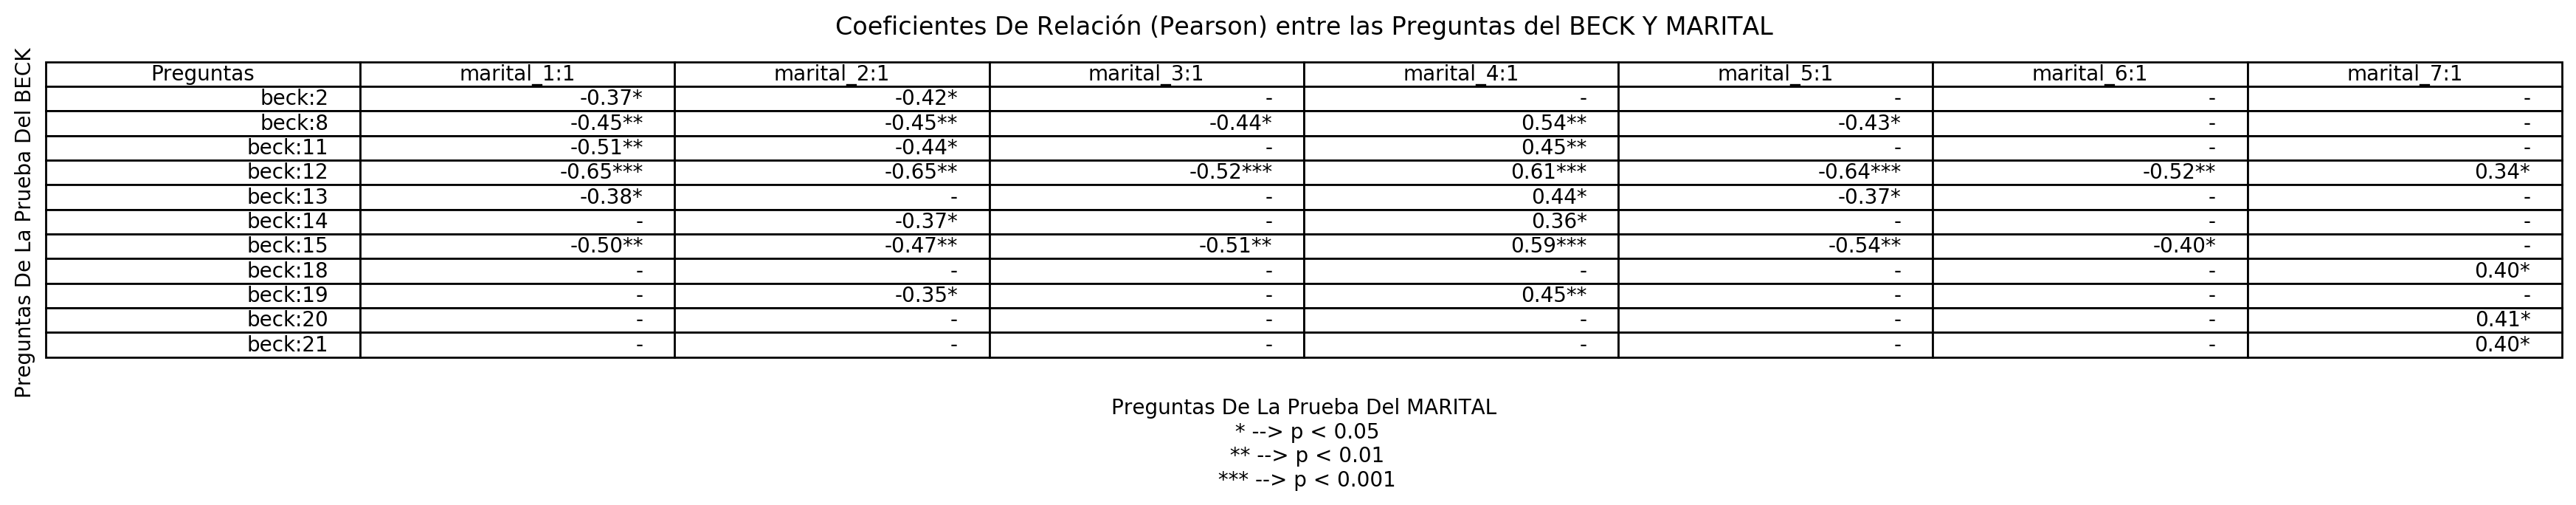

In [24]:
#Creando Subplots
fig, ax = plt.subplots(figsize=(22,3), dpi=200)
# hide axes
fig.patch.set_visible(False)
#Ocultando contorno y lineas/numeros de los ejes 
plt.box([])
plt.yticks([])
plt.xticks([])
#Titulo
plt.title("Coeficientes De Relación (Pearson) entre las Preguntas del BECK Y MARITAL", pad=10)
ax.table(cellText=relacion.values, colLabels=relacion.columns, loc="upper center")
ax.set_xlabel('Preguntas De La Prueba Del MARITAL\n * --> p < 0.05\n ** --> p < 0.01\n *** --> p < 0.001')
ax.set_ylabel('Preguntas De La Prueba Del BECK', labelpad=5)

#plt.tight_layout()
plt.savefig('BECK-MARITAL.jpg', bbox_inches='tight')
plt.show()

Resultado:

Las variables faltantes, en este caso **beck** y **marital** que no se encuentran dentro de la tabla, es debido al hecho de que no existio un P-valor (prueba estadistica) que respaldara la relación entre dichas variables.

Debido a eso, dichas variables han sido eliminadas de la tabla para permitir una lectura mas rapida de los valores que si aprovaron.

De la misma forma, los valores que contienen un " * " a lado de ellos, significa que pasaron con un valor de **P < 0.05**

Dos " ** " con un valor de **P < 0.01**

Tres " ** * " con un valor de **P < 0.001**.

Por consecuencia, al encontrar un valor con " ** * " significa que paso la prueba con **P < 0.05** y **P < 0.01**. 

Y aplica de la misma forma al encontrarse con valor que contenga " ** ".

### NDC VS Marital

In [25]:
#Funcion Creada para evaluar de forma automatica y mas rapida cada una de las preguntas 
def ndcvsmarital(marital, lista,p):
    """
    Esta funcion recibe como parametro el numero de la pregunta de Beck Para evaluar con las preguntas de Correspondientes al marital (que son 7 en total)
    Input: String o Entero para seleccionar la pregunta o variable
    Output: Retorna una lista con las variables que tienen cierta relacion en base a una significancia estadistica.
    Igual Imprime cada una de ellas. 
    """
    #Lista Vacia    
    var_column = "marital_"+str(marital)+":1"
    #Rango por la cantidad total de preguntas que le pertenecen al Beck
    for j in range(1,19): 
        #Valor que toma por variable
        ndc = "ndc:"+str(j)
        #Coeficiente de Pearson y P-valor entre las variables
        r, p_value = stats.pearsonr(data[var_column], data[ndc])
        #Formato de salida de texto
        #print(f"La significancia estadística entre la pregunta #{marital} del marital y la pregunta #{str(j)} del NDC es: \nP-Value: {p_value} \nCoeficiente de relación {r}\n")
        #Conservando solo las variables en las cuales el valor p es menor de 0.05 aceptadando que existe una relacion entre ambas
        if p_value <=p:
            string = f"La pregunta del marital #{marital} con la pregunta #{str(j)} del NDC con un P-valor de: {p_value} y Coeficiente De Relaccion (Pearson) de: {r}" 
            lista.append(string)
    return lista

### Variables (Preguntas) que tienen una relacion (P-valor<0.05) 


In [26]:
lista3=[]
lista3=ndcvsmarital(1, lista3, p=0.05)
lista3=ndcvsmarital(2, lista3, p=0.05)
lista3=ndcvsmarital(3, lista3, p=0.05)
lista3=ndcvsmarital(4, lista3, p=0.05)
lista3=ndcvsmarital(5, lista3, p=0.05)
lista3=ndcvsmarital(6, lista3, p=0.05)
lista3=ndcvsmarital(7, lista3, p=0.05)

In [27]:
for element in lista3:
    print(element)

La pregunta del marital #1 con la pregunta #9 del NDC con un P-valor de: 0.014088825388838322 y Coeficiente De Relaccion (Pearson) de: -0.4297835941245254
La pregunta del marital #1 con la pregunta #11 del NDC con un P-valor de: 0.046297730374693195 y Coeficiente De Relaccion (Pearson) de: 0.35481850319954555
La pregunta del marital #2 con la pregunta #9 del NDC con un P-valor de: 0.017114898684860307 y Coeficiente De Relaccion (Pearson) de: -0.41857133255186096
La pregunta del marital #3 con la pregunta #9 del NDC con un P-valor de: 0.007168113904238119 y Coeficiente De Relaccion (Pearson) de: -0.4661302053641569
La pregunta del marital #4 con la pregunta #11 del NDC con un P-valor de: 0.00926095901300369 y Coeficiente De Relaccion (Pearson) de: -0.4527973972888809
La pregunta del marital #5 con la pregunta #9 del NDC con un P-valor de: 0.0028730316992732125 y Coeficiente De Relaccion (Pearson) de: -0.5098712515147058
La pregunta del marital #7 con la pregunta #5 del NDC con un P-valo

### Variables (Preguntas) que tienen una relacion (P-valor<0.01) 


In [28]:
lista3=[]
lista3=ndcvsmarital(1, lista3, p=0.01)
lista3=ndcvsmarital(2, lista3, p=0.01)
lista3=ndcvsmarital(3, lista3, p=0.01)
lista3=ndcvsmarital(4, lista3, p=0.01)
lista3=ndcvsmarital(5, lista3, p=0.01)
lista3=ndcvsmarital(6, lista3, p=0.01)
lista3=ndcvsmarital(7, lista3, p=0.01)

In [29]:
for element in lista3:
    print(element)

La pregunta del marital #3 con la pregunta #9 del NDC con un P-valor de: 0.007168113904238119 y Coeficiente De Relaccion (Pearson) de: -0.4661302053641569
La pregunta del marital #4 con la pregunta #11 del NDC con un P-valor de: 0.00926095901300369 y Coeficiente De Relaccion (Pearson) de: -0.4527973972888809
La pregunta del marital #5 con la pregunta #9 del NDC con un P-valor de: 0.0028730316992732125 y Coeficiente De Relaccion (Pearson) de: -0.5098712515147058


### Variables (Preguntas) que tienen una relacion (P-valor<0.001) 


In [30]:
lista3=[]
lista3=ndcvsmarital(1, lista3, p=0.001)
lista3=ndcvsmarital(2, lista3, p=0.001)
lista3=ndcvsmarital(3, lista3, p=0.001)
lista3=ndcvsmarital(4, lista3, p=0.001)
lista3=ndcvsmarital(5, lista3, p=0.001)
lista3=ndcvsmarital(6, lista3, p=0.001)
lista3=ndcvsmarital(7, lista3, p=0.001)

In [31]:
for element in lista3:
    print(element)

### Mismos Resultados, pero representado en un tabla para mejorar la facilidad de lectura y comprension

Los valores son los mismos de lo que se encuentra en la parte superior.

En este caso, los valores *-* representan que dichos coeficientes no pasaron la prueba de significancia y no son considerados en esta situacion.

Mientras que los unicos valores dentro de esta son los que pasaron la prueba de significancia.


In [32]:
index = ['ndc:5','ndc:9', 'ndc:11']
values = {'marital_1:1':["-","-0.42*","0.35*"], 
          'marital_2:1':["-","-0.41*","-"],
          'marital_3:1':["-","-0.46**","-"],
          'marital_4:1':["-","-","-0.45**"],
          'marital_5:1':["-","-0.50**","-"], 
          'marital_7:1':["0.41*","-","-"]}

In [33]:
#Creando DataFrame
result= pd.DataFrame(values, index)
#Reseteando Index
result.reset_index(inplace=True)
#Renombrando
result.rename(columns={"index":"Preguntas"}, inplace=True)

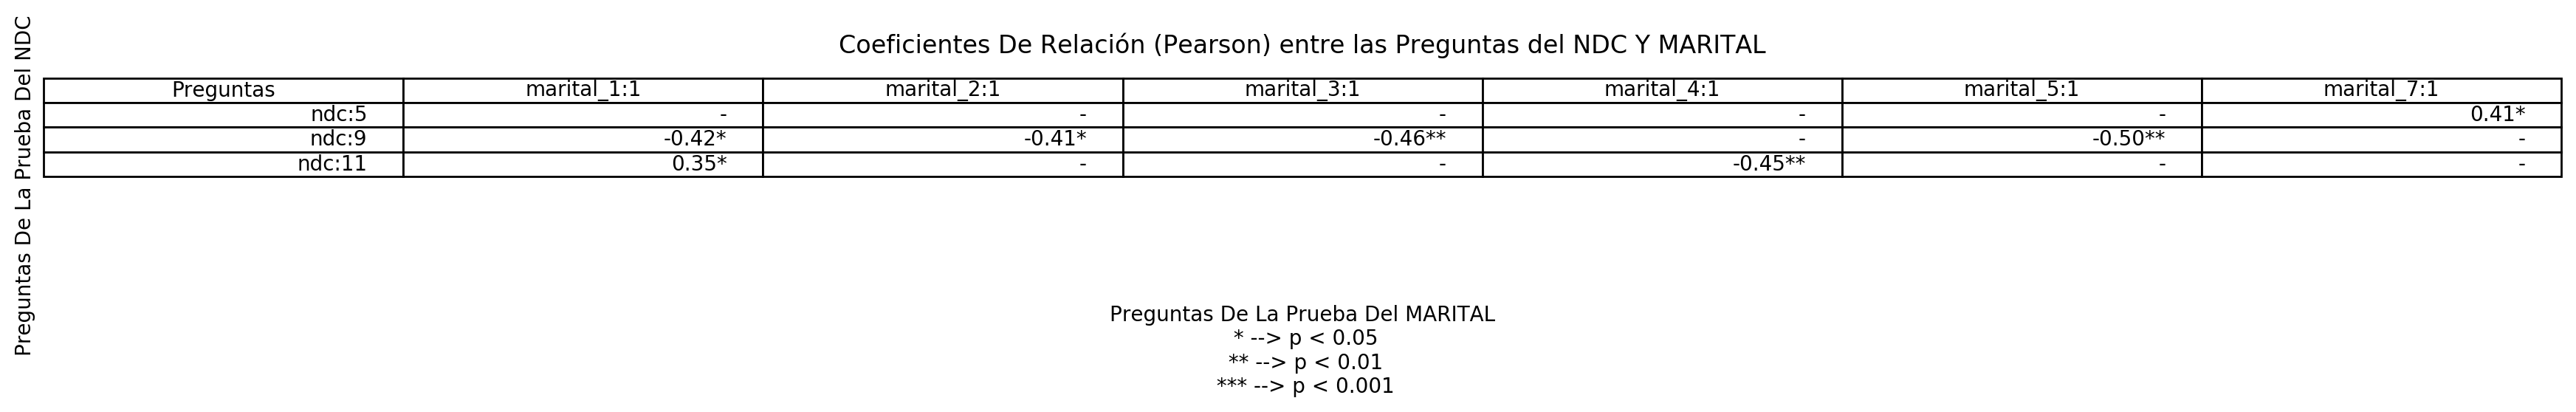

In [34]:
#Creando Subplots
fig, ax = plt.subplots(figsize=(22,2), dpi=200)
# hide axes
fig.patch.set_visible(False)
#Ocultando contorno y lineas/numeros de los ejes
plt.box([])
plt.yticks([])
plt.xticks([])
#Titulo
plt.title("Coeficientes De Relación (Pearson) entre las Preguntas del NDC Y MARITAL", pad=10)
ax.table(cellText=result.values, colLabels=result.columns, loc="upper center")
ax.set_xlabel('Preguntas De La Prueba Del MARITAL\n * --> p < 0.05\n ** --> p < 0.01\n *** --> p < 0.001')
ax.set_ylabel('Preguntas De La Prueba Del NDC')

#plt.tight_layout()
plt.savefig('NDC-MARITAL.jpg', bbox_inches='tight')
plt.show()

Resultado:

Las variables faltantes, en este caso **NDC** y **marital** que no se encuentran dentro de la tabla, es debido al hecho de que no existio un P-valor (prueba estadistica) que respaldara la relación entre dichas variables.

Debido a eso, dichas variables han sido eliminadas de la tabla para permitir una lectura mas rapida de los valores que si aprovaron.

De la misma forma, los valores que contienen un " * " a lado de ellos, significa que pasaron con un valor de **P < 0.05**

Dos " ** " con un valor de **P < 0.01**

Tres " ** * " con un valor de **P < 0.001**.

Por consecuencia, al encontrar un valor con " ** * " significa que paso la prueba con **P < 0.05** y **P < 0.01**. 

Y aplica de la misma forma al encontrarse con valor que contenga " ** ".